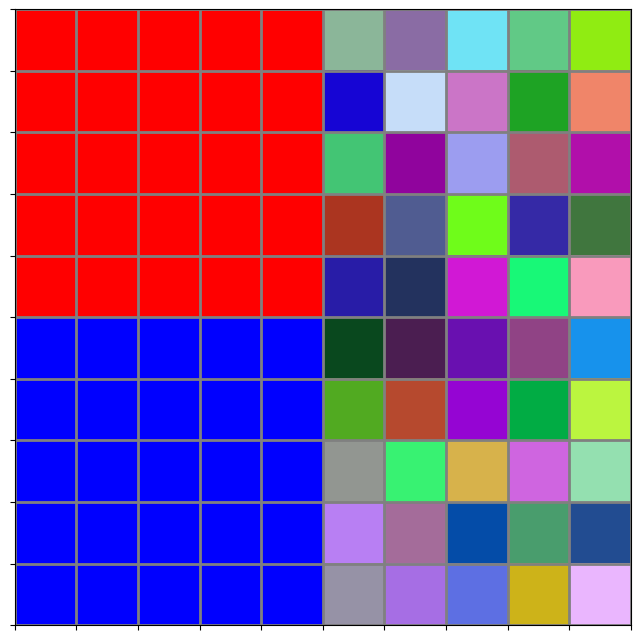

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid
grid_size = 10
square = np.zeros((grid_size, grid_size, 3))

# Fill 25% of the grid with two different colors: red and blue
square[:grid_size//2, :grid_size//2, :] = [1, 0, 0]  # Red color
square[grid_size//2:, :grid_size//2, :] = [0, 0, 1]  # Blue color

# Fill the remaining 50% with different colors
np.random.seed(0)  # For reproducibility
for i in range(grid_size):
    for j in range(grid_size//2, grid_size):
        square[i, j, :] = np.random.rand(3)

# Plotting the square
plt.figure(figsize=(8, 8))
plt.imshow(square, interpolation='none')
plt.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=2)
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.show()

